In [16]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

In [17]:
stock_data = pd.read_excel('../index_Infomation_v0.1.xlsx')
#stock_data = stock_data[['Date', 'apple_Close', 'snp500_Close']]
stock_data.loc[:, 'Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-11-01 00:00:00,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
1,2014-11-02 00:00:00,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
2,2014-11-03 00:00:00,4638.91015,2017.81005,17366.2402,1952.97,6.24,1.45,0.232372,3.843583,5.998912,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
3,2014-11-04 00:00:00,4623.64013,2012.09997,17383.8398,1935.19,6.15,1.43,0.232520,3.815476,5.955043,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
4,2014-11-05 00:00:00,4620.72021,2023.56994,17484.5292,1931.43,6.08,1.42,0.233553,3.824611,5.969301,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"


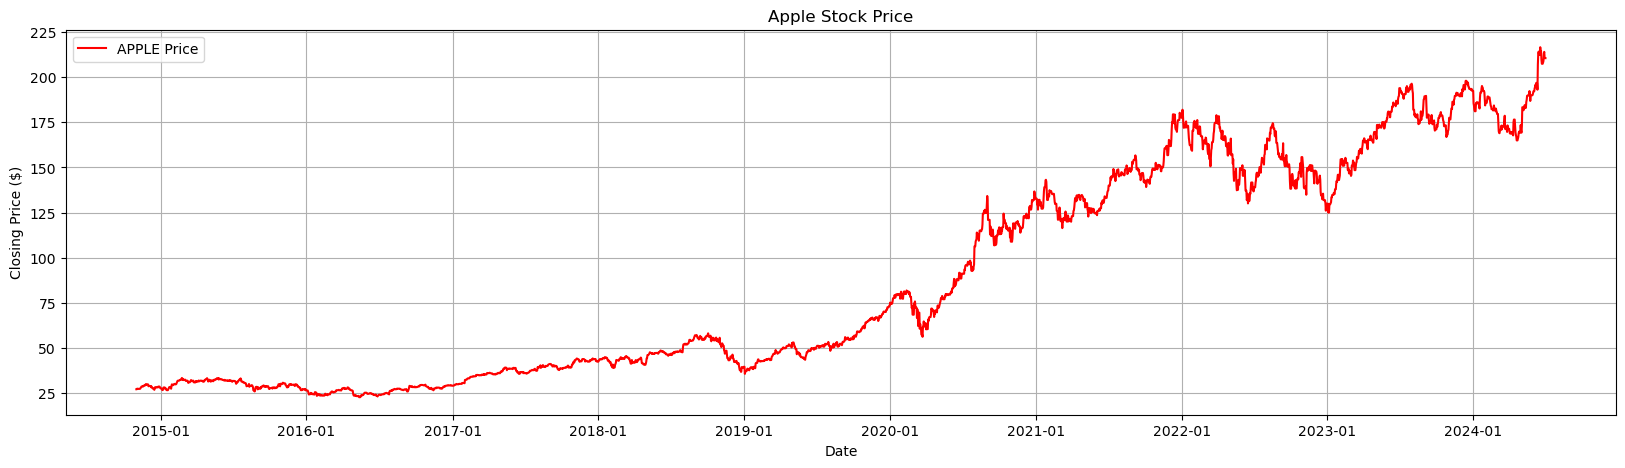

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(stock_data['Date'], stock_data['apple_Close'], label='APPLE Price', color='red')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.show()

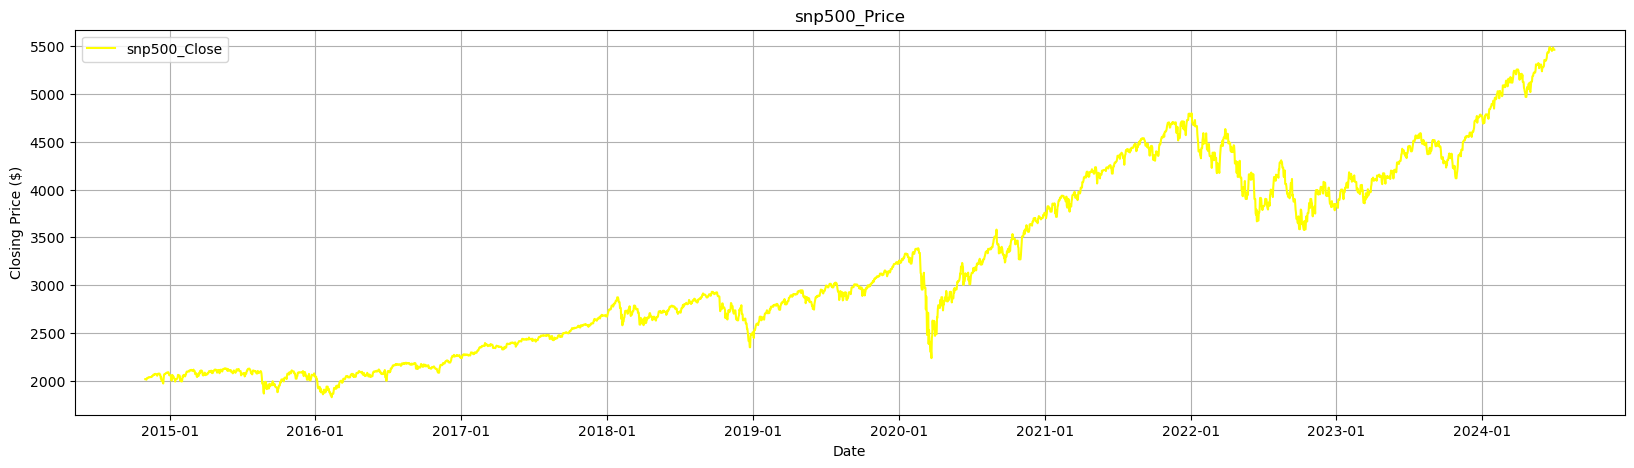

In [19]:
plt.figure(figsize=(20,5))
plt.plot(stock_data['Date'], stock_data['snp500_Close'], label='snp500_Close', color='yellow')
plt.title('snp500_Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# 0과 1사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

stock_data['apple_Close'] = normalize(stock_data, 'apple_Close')
stock_data['snp500_Close'] = normalize(stock_data, 'snp500_Close')

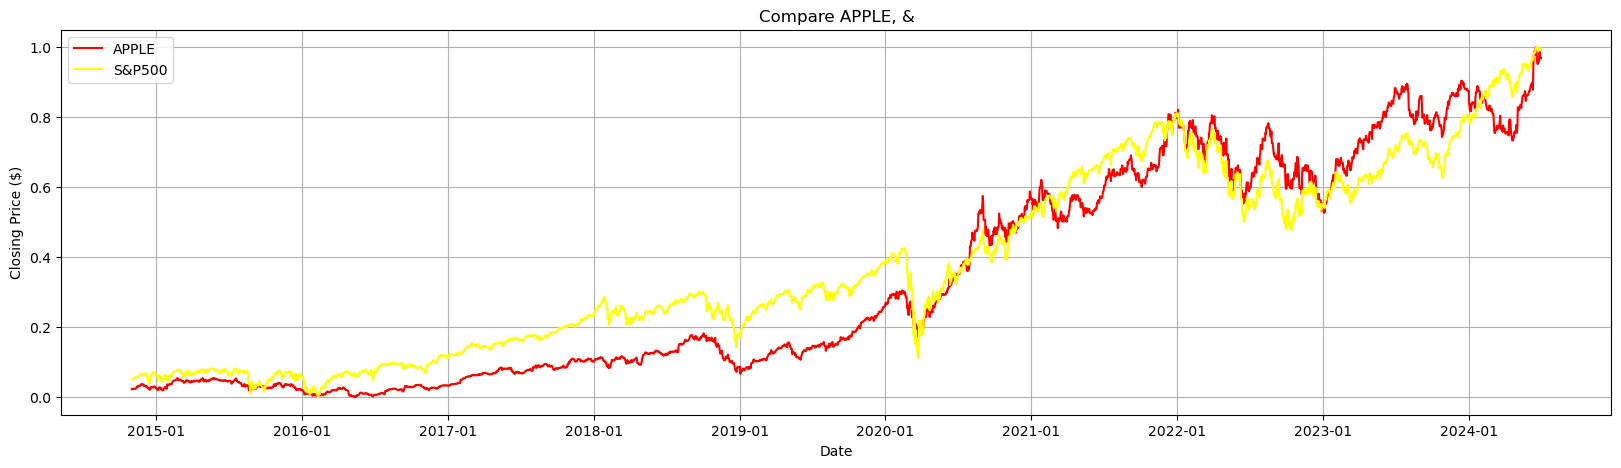

In [21]:
# 정규화 적용 두 그래프 합치기
plt.figure(figsize = (20, 5))
plt.plot(stock_data['Date'], stock_data['apple_Close'], label = 'APPLE', color='red')
plt.plot(stock_data['Date'], stock_data['snp500_Close'], label = 'S&P500', color = 'yellow')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Compare APPLE, &')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Calculate the correlation
correlation = stock_data['apple_Close'].corr(stock_data['snp500_Close'])
print(f"Correlation between Exchange Ratio and Samsung Stock Price: {correlation:.2f}")

Correlation between Exchange Ratio and Samsung Stock Price: 0.97


In [23]:
fluctuation_apple = stock_data['apple_Close'].pct_change()
fluctuation_snp500 = stock_data['snp500_Close'].pct_change()

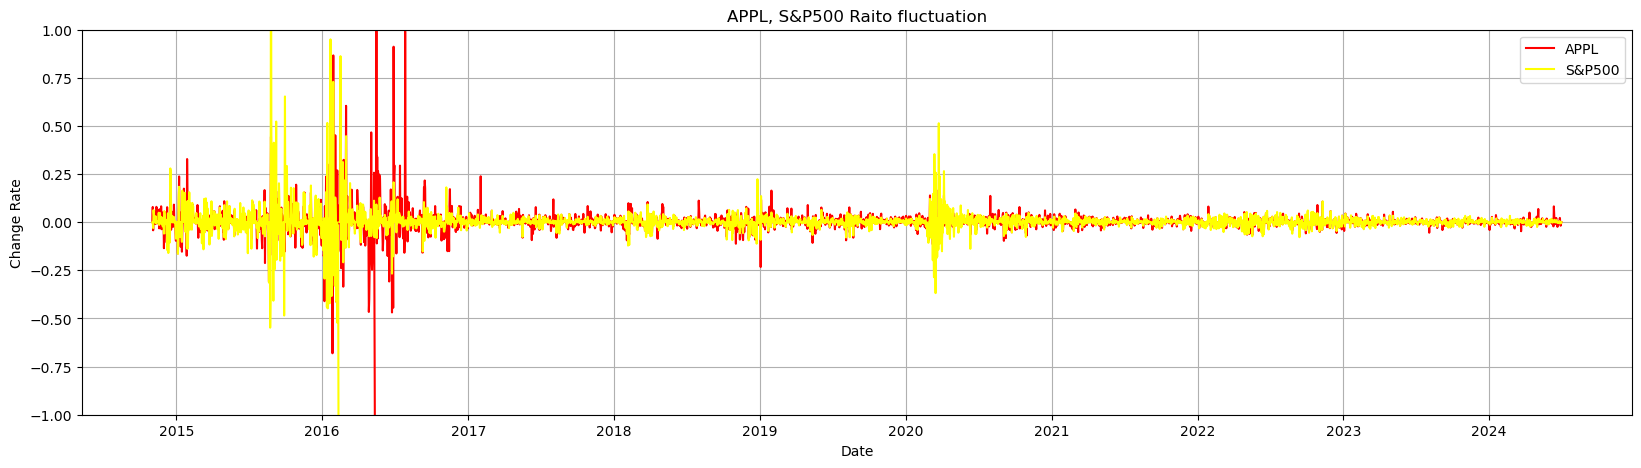

In [24]:
plt.figure(figsize = (20, 5))
plt.plot(stock_data['Date'], fluctuation_apple, label = 'APPL', color='red')
plt.plot(stock_data['Date'], fluctuation_snp500, label = 'S&P500', color='yellow')
plt.ylim(-1, 1)
plt.title('APPL, S&P500 Raito fluctuation')
plt.xlabel('Date')
plt.ylabel('Change Rate')
plt.legend()
plt.grid(True)
plt.show()

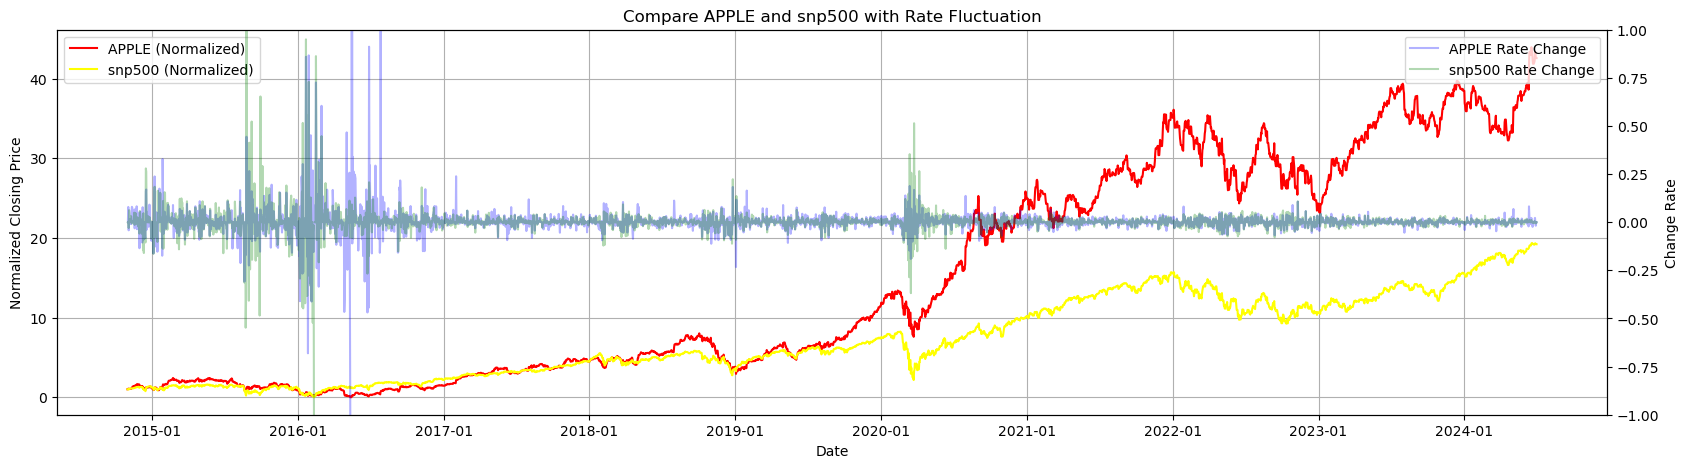

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 가상의 데이터 예시
# stock_data = pd.read_csv('your_data.csv')

# 정규화된 주가 데이터
stock_data['norm_apple_Close'] = stock_data['apple_Close'] / stock_data['apple_Close'].iloc[0]
stock_data['norm_snp500_Close'] = stock_data['snp500_Close'] / stock_data['snp500_Close'].iloc[0]

# 변동률 계산
fluctuation_apple = stock_data['apple_Close'].pct_change()
fluctuation_snp500 = stock_data['snp500_Close'].pct_change()

# 플롯 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))

# 첫 번째 y축 (정규화된 주가)
ax1.plot(stock_data['Date'], stock_data['norm_apple_Close'], label='APPLE (Normalized)', color='red')
ax1.plot(stock_data['Date'], stock_data['norm_snp500_Close'], label='snp500 (Normalized)', color='yellow')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Price')
ax1.set_title('Compare APPLE and snp500 with Rate Fluctuation')
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.grid(True)

# 두 번째 y축 (변동률)
ax2 = ax1.twinx()
ax2.plot(stock_data['Date'], fluctuation_apple, label='APPLE Rate Change', color='blue', alpha=0.3)
ax2.plot(stock_data['Date'], fluctuation_snp500, label='snp500 Rate Change', color='green', alpha=0.3)
ax2.set_ylabel('Change Rate')
ax2.set_ylim(-1, 1)
ax2.legend(loc='upper right')

plt.show()


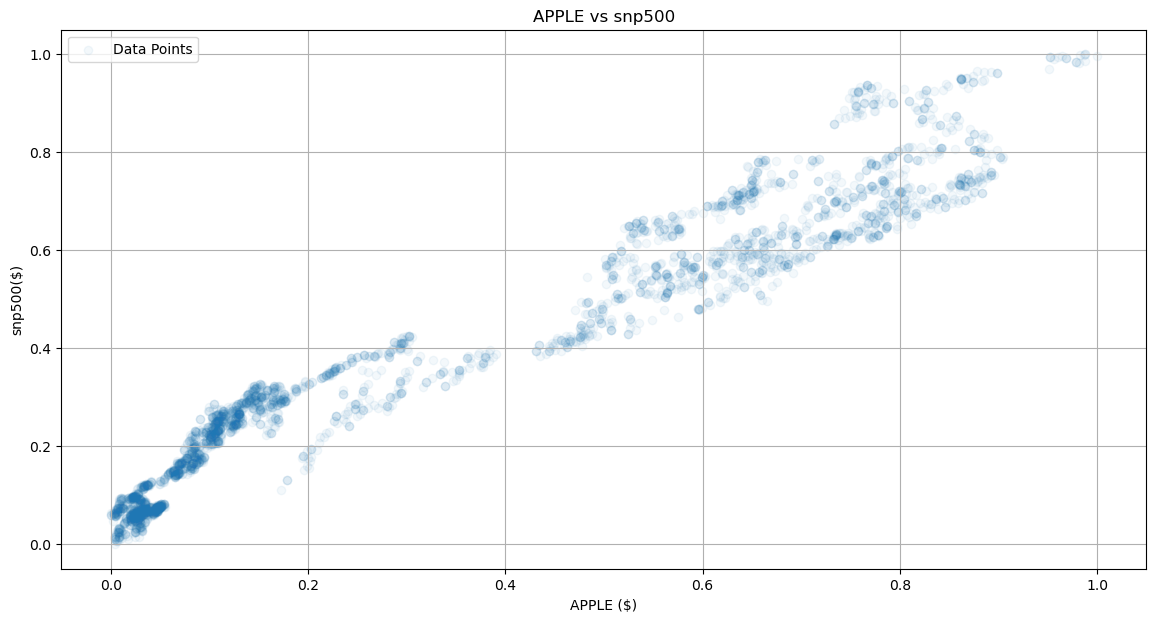

In [26]:
# 산점도 그래프

plt.figure(figsize = (14, 7))
plt.scatter(stock_data['apple_Close'], stock_data['snp500_Close'], alpha = 0.05, label = 'Data Points')

plt.title('APPLE vs snp500')
plt.xlabel('APPLE ($)')
plt.ylabel('snp500($)')

plt.legend()
plt.grid(True)

plt.show()

In [27]:
compare1 = "apple"  # samsung, apple
compare2 = "s&p500"
compare2data = "snp500_Close"

In [28]:
# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}', 'dollar_to_won_Close']]
df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
df.head(3)

def normalize_data(series):
    # MinMaxScaler를 사용하여 데이터를 -1과 1 사이로 정규화
    scaler = MinMaxScaler(feature_range=(-1, 1))
    return scaler.fit_transform(series.values.reshape(-1, 1))

def Regression(compare1, compare2data, compare2):
    # 데이터 정규화
    stock_data[f'{compare1}_Close_Normalized'] = normalize_data(stock_data[f'{compare1}_Close'])
    stock_data[f'{compare2data}_Normalized'] = normalize_data(stock_data[f'{compare2data}'])

    # 선형 회귀 분석
    X = stock_data[f'{compare1}_Close_Normalized']
    y = stock_data[f'{compare2data}_Normalized']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # 회귀 분석 결과 출력
    print(model.summary())

    # 산점도 및 회귀선 그래프
    plt.scatter(stock_data[f'{compare2data}_Normalized'], stock_data[f'{compare1}_Close_Normalized'], label='Data points')
    plt.plot(stock_data[f'{compare2data}_Normalized'], predictions, color='red', label='Regression line')
    plt.xlabel(f'{compare2} (Normalized)')
    plt.ylabel(f'{compare1} (Normalized)')
    plt.legend()
    plt.show()

C:\Users\4호실-8\AppData\Local\Temp\ipykernel_11500\1423842406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])


In [29]:

def rolling_correlation_and_granger_test(compare1, compare2data, compare2, window_size=30, max_lag=5, stock_data=stock_data):
    col1 = f'{compare1}_Close'
    col2 = compare2data

    # 날짜 인덱스 설정
    if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
        stock_data.index = pd.to_datetime(stock_data['Date'])
        stock_data = stock_data.drop(columns=['Date'])

    # 롤링 상관관계 계산
    rolling_corr = stock_data[col1].rolling(window=window_size).corr(stock_data[col2]).dropna()

    # 무한 값과 NaN 값 제거
    rolling_corr = rolling_corr[~rolling_corr.isin([np.inf, -np.inf])].dropna()

    # 롤링 상관관계 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr)
    plt.xlabel('Date')
    plt.ylabel('Rolling Correlation')
    plt.title(f'Dynamic Correlation between {col1} and {compare2}')
    plt.show()

    # 롤링 상관관계의 히스토그램 그리기
    plt.figure(figsize=(10, 6))
    plt.hist(rolling_corr, bins=30, edgecolor='k')
    plt.xlabel('Rolling Correlation')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Rolling Correlations between {col1} and {compare2}')
    plt.show()

    # 그랜저 인과성 테스트
    granger_test_result = grangercausalitytests(stock_data[[col1, col2]], max_lag, verbose=True)

    return rolling_corr, granger_test_result

In [30]:
def Granger(compare1, compare2data, compare2, stock_data=stock_data):
    if f'{compare1}_Close' not in stock_data.columns or compare2data not in stock_data.columns:
        raise KeyError(f"Columns {compare1}_Close and/or {compare2data} not found in the provided DataFrame")
    
    max_lag = 2
    result1 = grangercausalitytests(stock_data[[f'{compare1}_Close', compare2data]], max_lag, verbose=True)
    result2 = coint_johansen(stock_data[[f'{compare1}_Close', compare2data]], det_order=-1, k_ar_diff=1)
    
    return result1, result2.lr1, result2.cvt

c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2720  , p=0.2595  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=1.2731  , p=0.2592  , df=1
likelihood ratio test: chi2=1.2729  , p=0.2592  , df=1
parameter F test:         F=1.2720  , p=0.2595  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.0163  , p=0.0009  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=14.0525 , p=0.0009  , df=2
likelihood ratio test: chi2=14.0246 , p=0.0009  , df=2
parameter F test:         F=7.0163  , p=0.0009  , df_denom=3523, df_num=2
                               OLS Regression Results                              
Dep. Variable:     snp500_Close_Normalized   R-squared:                       0.938
Model:                                 OLS   Adj. R-squared:                  0.938
Method:                      Least Squares   F-statistic:                 5.318e+04
Date:                     Thu, 08 Aug 2024   Prob (F-sta

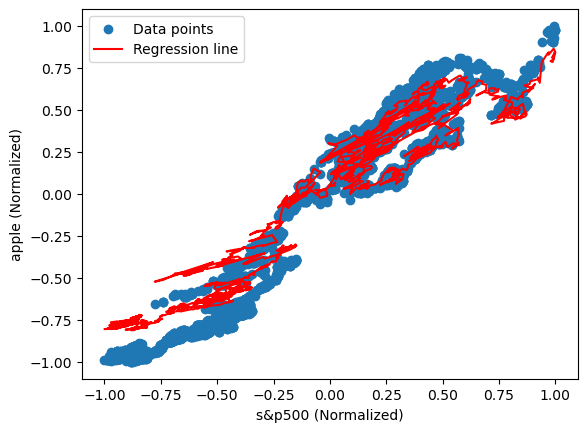

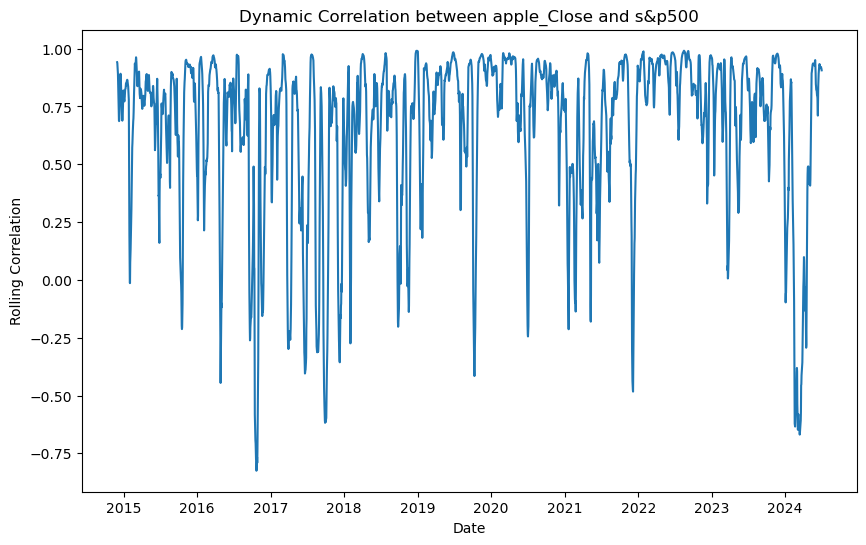

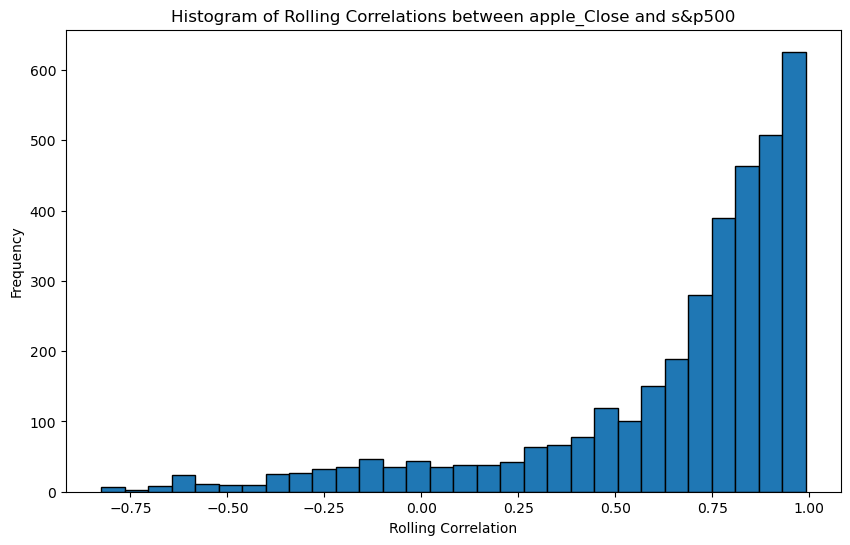


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2720  , p=0.2595  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=1.2731  , p=0.2592  , df=1
likelihood ratio test: chi2=1.2729  , p=0.2592  , df=1
parameter F test:         F=1.2720  , p=0.2595  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.0163  , p=0.0009  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=14.0525 , p=0.0009  , df=2
likelihood ratio test: chi2=14.0246 , p=0.0009  , df=2
parameter F test:         F=7.0163  , p=0.0009  , df_denom=3523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.0125  , p=0.0001  , df_denom=3520, df_num=3
ssr based chi2 test:   chi2=21.0793 , p=0.0001  , df=3
likelihood ratio test: chi2=21.0165 , p=0.0001  , df=3
parameter F test:         F=7.0125  , p=0.0001  , df_denom=3520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.5416  , p=0.

c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [31]:
def everything(compare1, compare2data, compare2):
    Granger(compare1, compare2data, compare2)
    Regression(compare1, compare2data, compare2)
    rolling_correlation_and_granger_test(compare1, compare2data, compare2)
everything(compare1, compare2data, compare2)